In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from scipy import stats

In [2]:
train_set = pd.read_csv("./question2/forestfires.csv")

In [3]:
train_set.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

## look into our goal--area
- basic description
- skew
- kurtosis

In [4]:
train_set.area.describe()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64

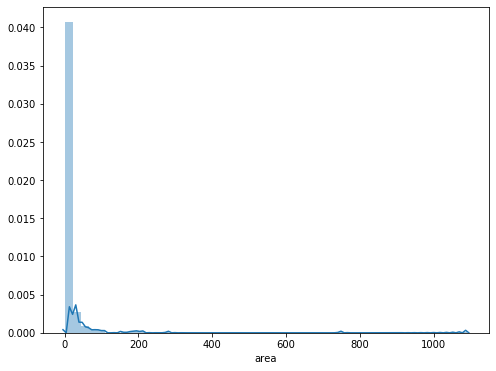

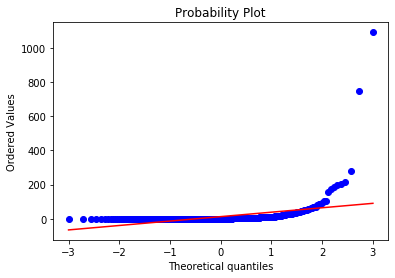

In [47]:
fig = plt.figure(figsize=(8,6))
sn.distplot(train_set.area)
fig = plt.figure()
_ = stats.probplot(train_set.area,plot = plt)

In [6]:
print("skew: {}\n kurtosis: {}".format(train_set.area.skew(),train_set.area.kurt()))

skew: 12.846933533934868
 kurtosis: 194.1407210942299


In [7]:
## fix the skewness
train  = train_set.copy()
print("the zero count:%d" %(train.area==0).sum())
train.area = np.log1p(train.area)

the zero count:247


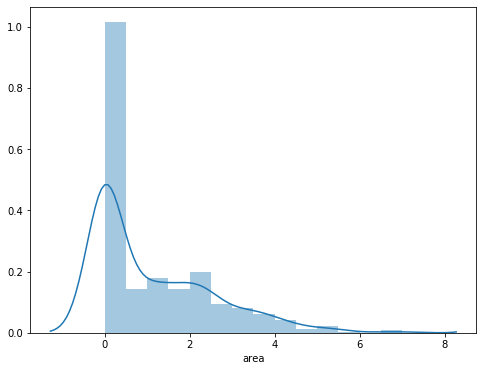

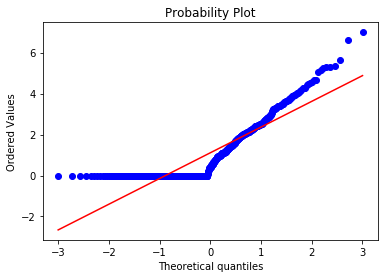

In [8]:
fig = plt.figure(figsize=(8,6))
sn.distplot(train.area)
fig = plt.figure()
_ = stats.probplot(train.area,plot = plt)

In [9]:
##some out liars but i am too lazy to delete let's move on

In [10]:
features = list(set(train.columns)-set(['area']))

In [11]:
train._get_numeric_data??

<Figure size 432x288 with 0 Axes>

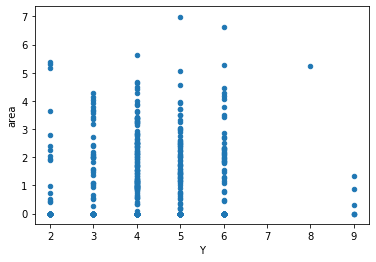

<Figure size 432x288 with 0 Axes>

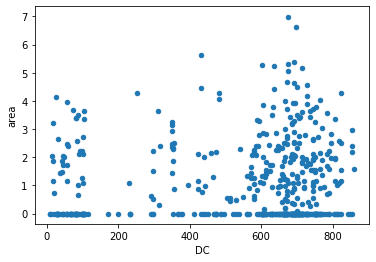

<Figure size 432x288 with 0 Axes>

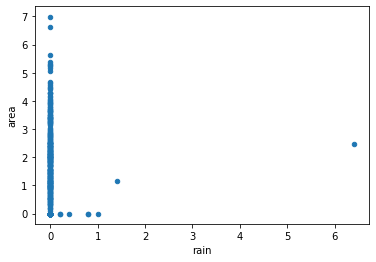

<Figure size 432x288 with 0 Axes>

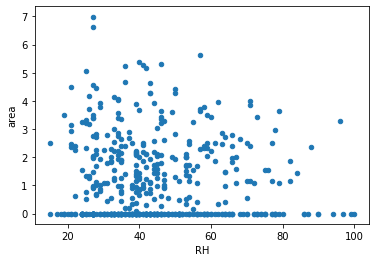

<Figure size 432x288 with 0 Axes>

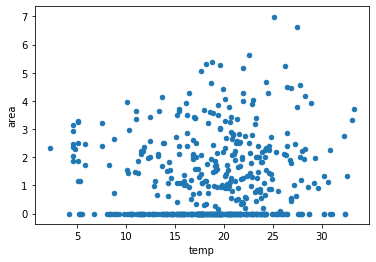

<Figure size 432x288 with 0 Axes>

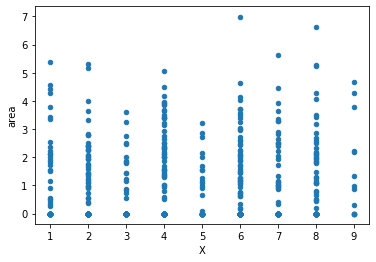

<Figure size 432x288 with 0 Axes>

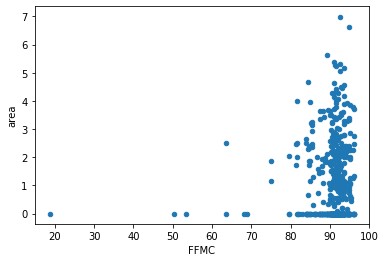

<Figure size 432x288 with 0 Axes>

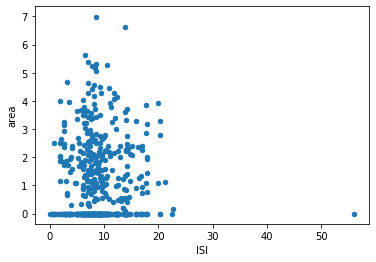

<Figure size 432x288 with 0 Axes>

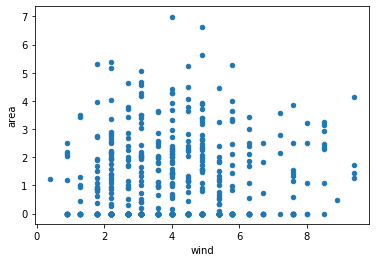

<Figure size 432x288 with 0 Axes>

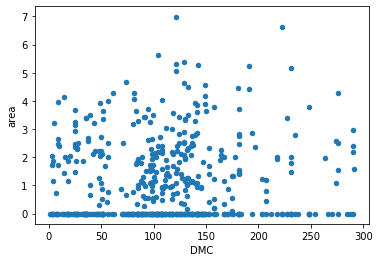

In [12]:
train_numeric = train._get_numeric_data()
numeric_f = list(set(train_numeric.columns)-set(['area']))
for var in numeric_f:
    fig = plt.figure()
    train_numeric.plot.scatter(x=var,y="area")

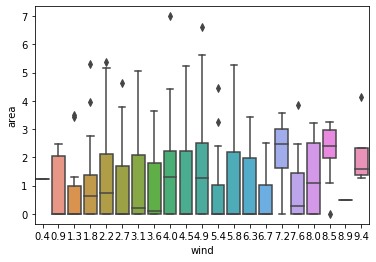

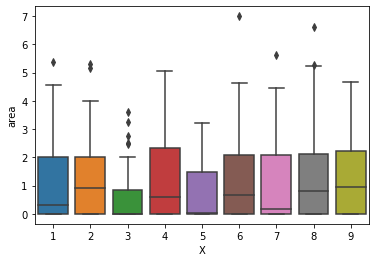

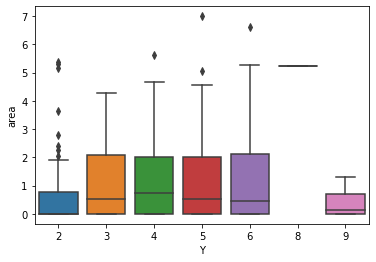

In [13]:
for var in ['wind','X','Y']:
    fig = plt.figure()
    sn.boxplot(x = train[var],y = train.area)

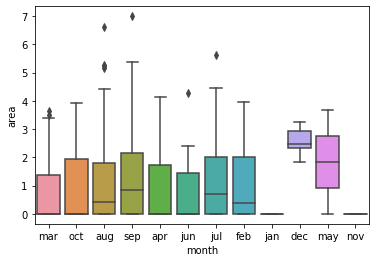

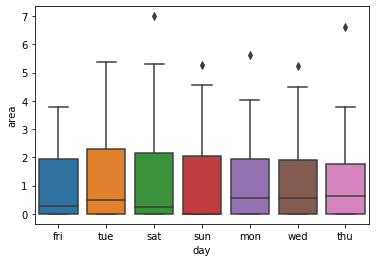

In [14]:
cate_f = list(train.select_dtypes(exclude=[np.number]))
for var in cate_f:
    fig = plt.figure()
    sn.boxplot(x = train[var],y = train.area)

/home/fuyonghao/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


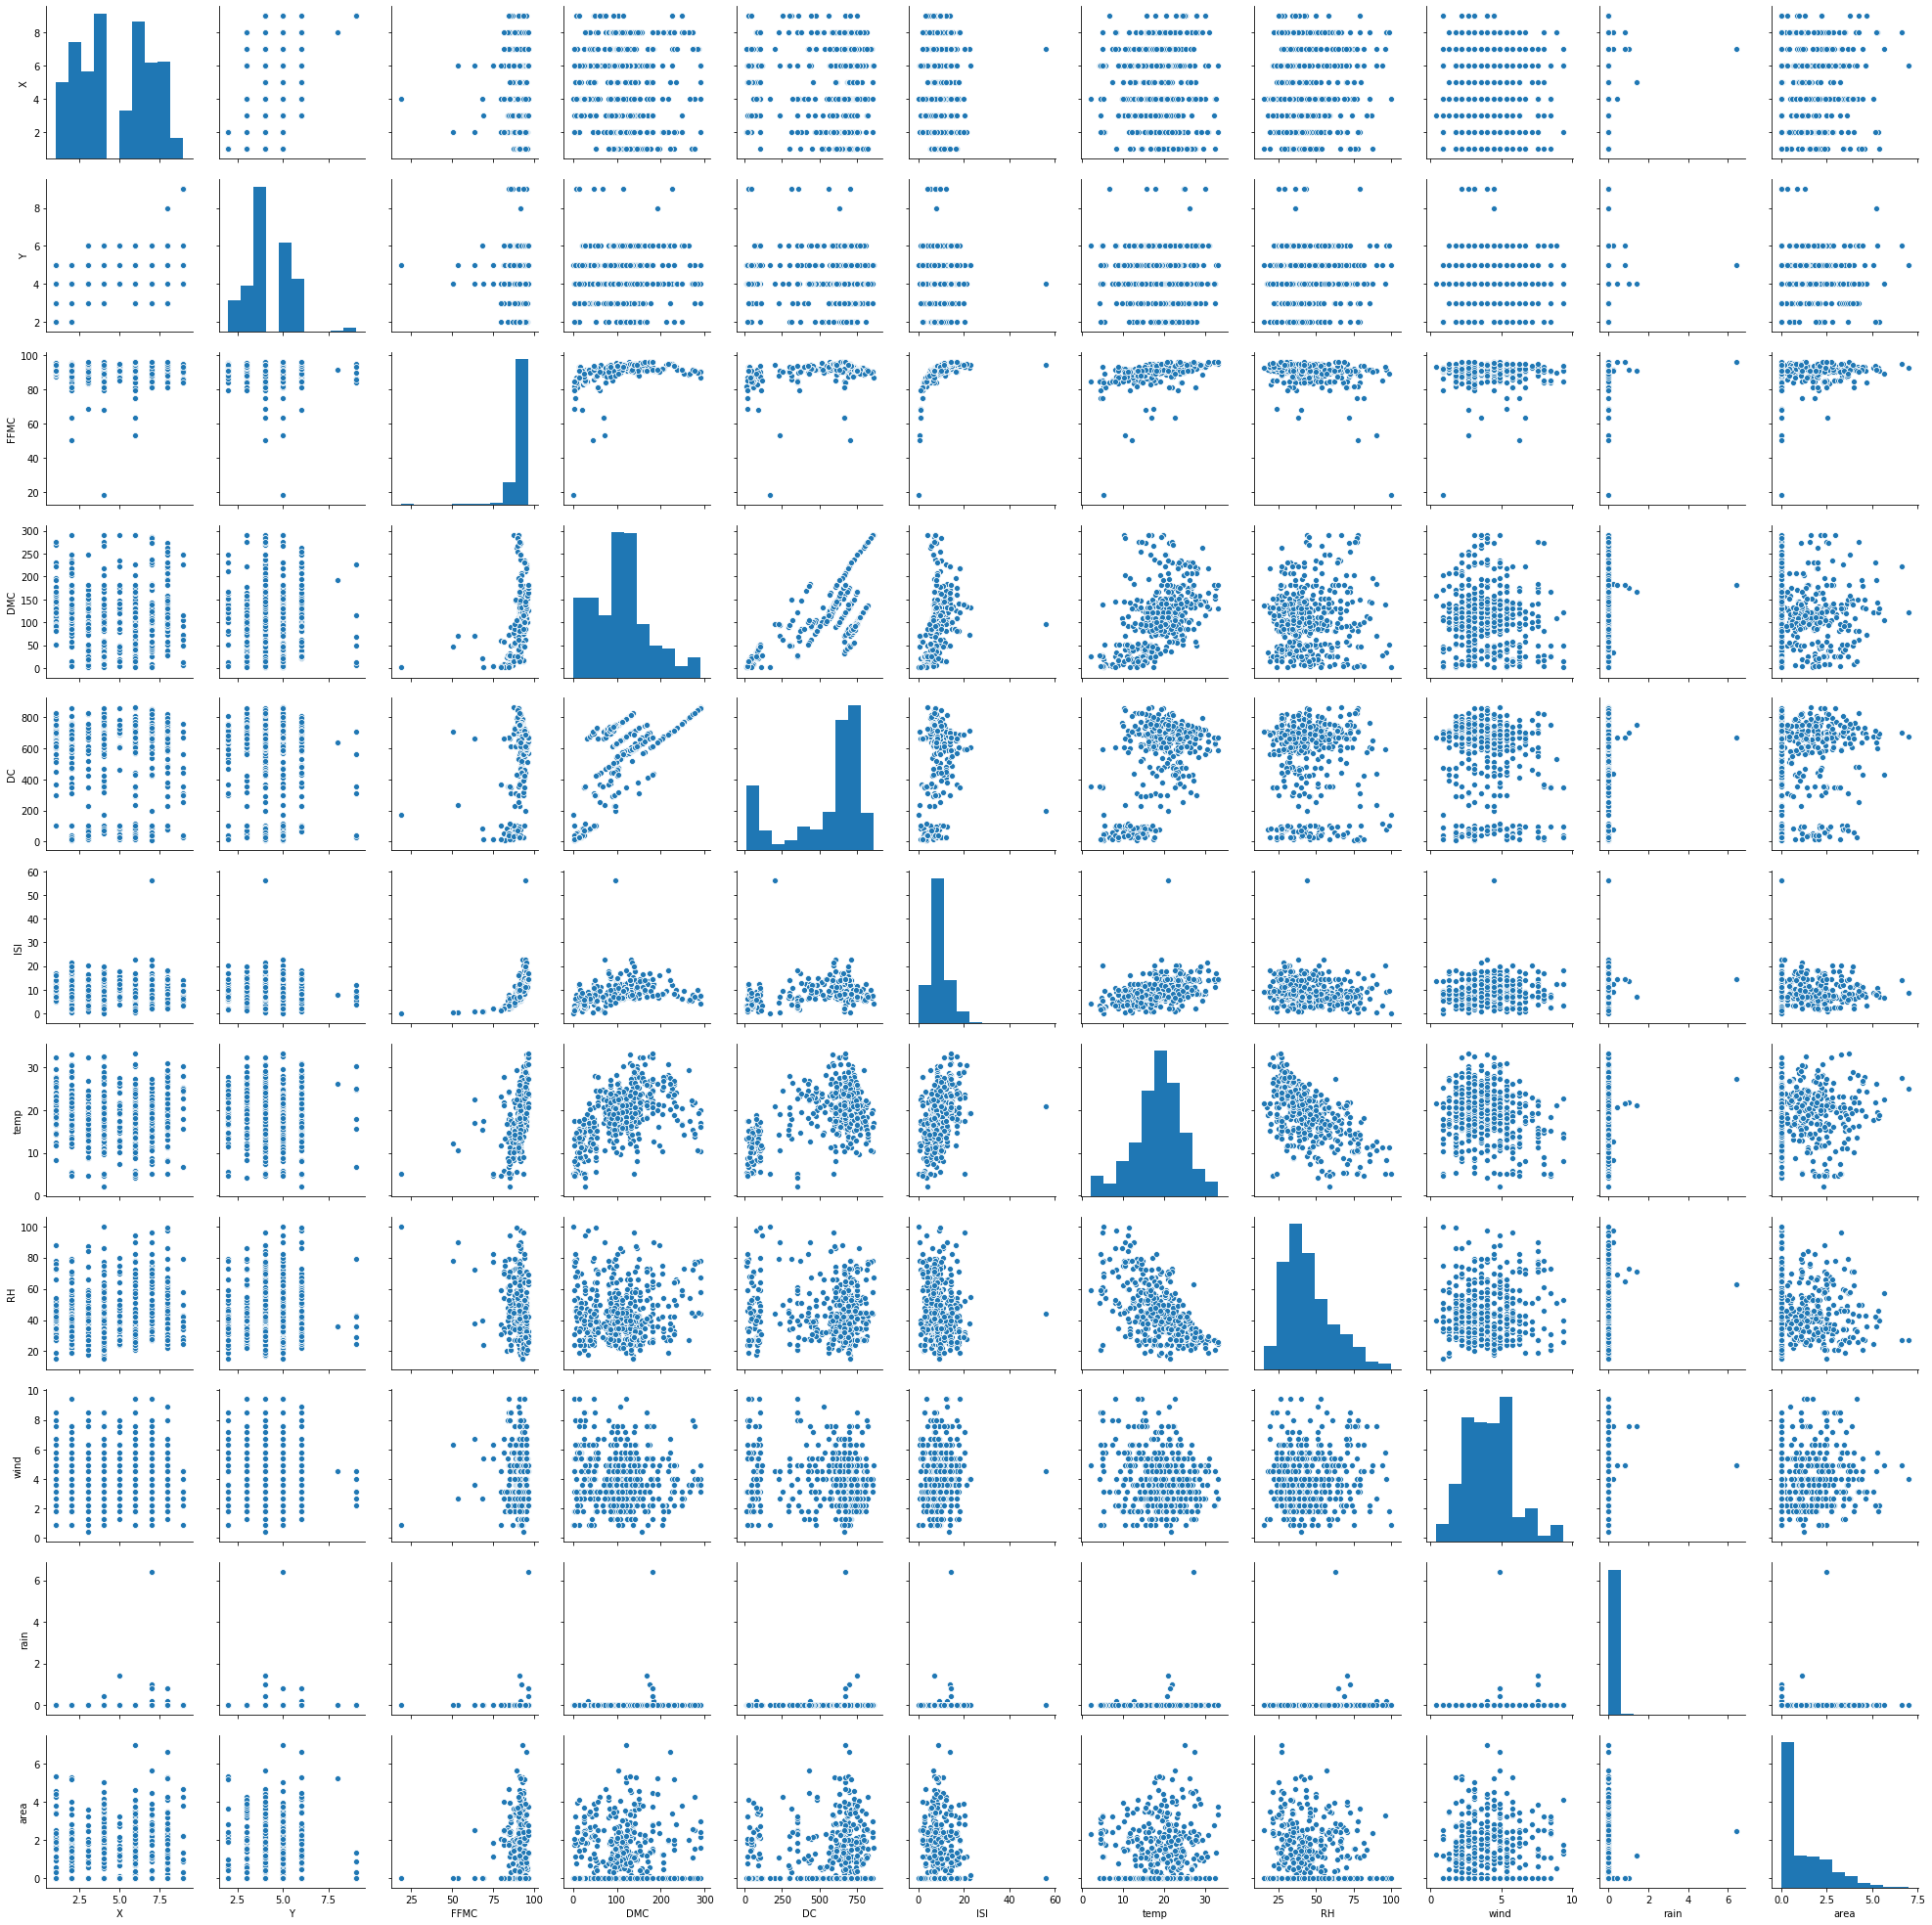

In [15]:
sn.pairplot(train,size=2.5)
plt.show()

In [16]:
train = pd.get_dummies(train)

In [17]:
train.head()##turn the categorical data into onehot

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0


In [18]:
train.shape

(517, 30)

In [19]:
X = train.drop('area',axis = 1)
Y = train.area
train_x = X[:400] 
train_y = Y[:400] 
test_x = X[400:]
test_y = Y[400:]

## Modeling

In [20]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


In [21]:
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10))
    return rmse

In [22]:
Lasso()

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
error = rmse_cv(Lasso(),train_x,train_y)

In [24]:
print(error.std())
print(error.mean())

0.6047176720359919
1.348798378084471


In [25]:
models = [LinearRegression(),Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3),BayesianRidge(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(),XGBRegressor()]

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra","Xgb"]
for name, model in zip(names, models):
    score = rmse_cv(model, train_x, train_y)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

LR: 1.462959, 0.6146
Ridge: 1.403492, 0.6185
Lasso: 1.378987, 0.6014
RF: 1.521829, 0.6687
GBR: 1.564296, 0.6323
SVR: 1.319355, 0.7336
LinSVR: 1.816825, 0.8140
Ela: 1.413756, 0.6263
SGD: 144473399346386.562500, 78113046164300.5938
Bay: 1.351435, 0.6027
Ker: 1.842027, 0.6589
Extra: 1.694325, 0.6219
[21:13:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:13:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:13:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:13:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:13:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:13:16] WARNING: /workspace/src/objective/regression_obj.cu:152:

In [28]:
## SVR is the champion

In [46]:
grid_search = GridSearchCV(estimator=SVR(),param_grid = {"kernel":['poly', 'rbf', 'sigmoid']},cv=5,n_jobs=10,scoring="neg_mean_squared_error")
grid_search.fit(train_x,train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=10,
             param_grid={'kernel': ['poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [43]:
print(grid_search.best_params_,np.sqrt(-grid_search.best_score_))

{'coef0': 0.0, 'degree': 2, 'epsilon': 0.3, 'kernel': 'rbf'}

In [ ]:
print(grid_search.best_params_,np.sqrt(-grid_search.best_score_))

In [41]:
GridSearchCV??

In [ ]:
model = SVR

In [30]:
model.fit(train_x,train_y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
preds = model.predict(test_x)

In [32]:
print("rmse in the loged value: %f" %np.sqrt(mean_squared_error(y_true=test_y,y_pred=preds)))

rmse in the loged value: 1.536488


In [33]:
preds = np.expm1(preds)##turning back with expm1

In [34]:
preds.shape

(117,)

In [35]:
ground_truth = train_set.area[-preds.shape[0]:]

In [36]:
print("rmse in the test set with true value: %f" %np.sqrt(mean_squared_error(y_true=ground_truth,y_pred=preds)))

rmse in the test set with true value: 77.114543
